In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
import qbraid_algorithms
dir(qbraid_algorithms)

AttributeError: module 'qbraid_algorithms.QasmBuilder' has no attribute 'GateLibrary:'

In [ ]:
from qbraid_algorithms.QTran import *
from qbraid_algorithms.QFT_2 import  *
from qbraid_algorithms.amplitude_amplification import *
import pyqasm as pq

AttributeError: module 'qbraid_algorithms.QasmBuilder' has no attribute 'GateLibrary:'

<div class="alert alert-block alert-info">
<h1>QasmBuilder Demo</h6>

QasmBuilder is a small tool to help build out algorithms within the qbraid algorithms package. <br>
It is a macroed string builder at heart which exposes development at all levels of abstraction, <br>
and is a QOL feature. Its patterns can be pierced at any point in time and development if the <br>
overhead is too much. This comes at minimal cost to system QOL benefits like easy import and <br>
ancilla tracking, with the only risk being the lack of guarantee of programmatic correctness of <br>
developer added code
***
This notebook looks to demonstrate the package structure and the design patterns first expected <br>
from this package

</div>


<b>QOL items this package provides:</b><br>
RESOURCE MANAGEMENT:<br>

- Use claim_qubits() and claim_clbits() for dynamic allocation
- Track resource usage across library imports
- Ensure proper cleanup of scope levels before building

ERROR HANDLING:<br>

- All builders check for unclosed scopes before generation
- Invalid gate references are caught during library operations
- Resource conflicts are handled through the allocation system


<div class="alert alert-block alert-success">
<b>Here is a short demo of the power of the QasmBuilder library before diving deeper</b> 
</div>

OPENQASM 3.0;
include "std_gates.inc";
qubit[5] qb;
bit[5] cb;
x qb[1];
for int i in [0:4] {
  x qb[i];
}
cb[{1}] = measure qb[{1}];



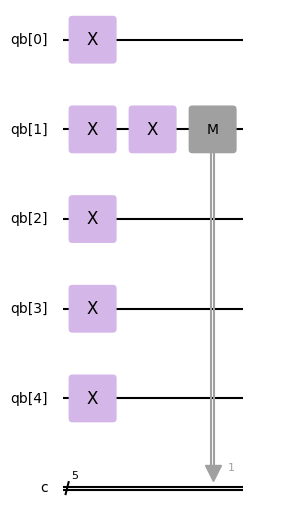

In [ ]:
# Create 10-qubit circuit with OpenQASM 3.0
alg = QasmBuilder(10, version="3") 
register = [*range(10)]

# Import standard gates library
program = alg.import_library(std_gates)

# Import QFT library
qft = alg.import_library(QFTLibrary)

# Apply gates
program.x(1)                           # X gate on qubit 1
program.comment("Multi-line comment")  # Add documentation
program.comment("Single line comment") # More documentation

# Loop example
program.begin_loop(5)                  # Loop 5 times
program.x("i")                     # X gate using loop variable (default i)
program.comment("Inside loop")     # Scoped comment
program.end_loop()                     # End loop
qft.QFT(register[:5])
# Measurement
program.measure([1], [1])              # Measure qubit 1 → classical bit 1

prog = alg.build()
# print(program)
res = pq.loads(prog)
print(res)
pq.draw(res)
        

## The QasmBuilder Object


This library provides a flexible framework for generating OpenQASM code through
a hierarchical builder pattern. It supports different output formats including
complete quantum circuits, gate definitions, and include files. 
Built on top of the the root FileBuilder class which seperates text content from
structure/semantics requirements unique to each file

Key Features:
- Automatic scope and indentation management
- Library import and gate definition tracking
- Multiple output formats (QASM circuits, includes, gate definitions)
- Resource allocation for qubits and classical bits
- Extensible design for custom quantum libraries

Class Extensions:
- GateBuilder
- QasmBuilder
- IncludeBuilder

### QASMBUILDER OBJECT TYPICAL USAGE PATTERNS:



1. Building a complete Quantum Circuit:<br>
> builder = QasmBuilder(qubits=5, clbits=5)<br>
> gates = builder.import_library(std_gates)<br>
> gates.h(0)<br>
> gates.cx(0, 1)<br>
> circuit_code = builder.build()<br>

2. Gate Library Development:<br>
> builder = GateBuilder()<br>
> gates = builder.import_library(std_gates)<br>
> \\\ Define custom gates...<br>
> program, imports, definitions = builder.build()<br>

3. Include File Creation:<br>
> builder = IncludeBuilder()<br>
> \\ Add gate definitions and utilities...<br>
> with open("include.inc",'w') as i:
>> include_content = builder.build()<br>
>> i.write(include_content)

### The GateLibrary Object

#

In [ ]:
alg = QasmBuilder(8,version="3") 
qft = alg.import_library(QFTLibrary)


qft.QFT([*range(3)])

qft.QFT([*range(3)])
# print(alg.build())


prog = alg.build()
# print(program)
res = pq.loads(prog)
print(res)
pq.draw(res)

OPENQASM 3.0;
include "std_gates.inc";
qubit[8] qb;
bit[8] cb;
gate QFT3S a, b, c {
  h a;
  cp(pi / 2) a, b;
  cp(pi / 4) a, c;
  h b;
  cp(pi / 2) b, c;
  h c;
}
QFT3S qb[0], qb[1], qb[2];
QFT3S qb[0], qb[1], qb[2];



AttributeError: 'numpy.ndarray' object has no attribute 'set_ylim'

In [ ]:
# Create 10-qubit circuit with OpenQASM 3.0
alg = QasmBuilder(5, version="3") 
reg = [*range(5)]

# Import standard gates library
program = alg.import_library(std_gates)

# Import Amplitude amplification library
ampl = alg.import_library(AALibrary)

class Za(GateLibrary):
    name = "Z_on_two"
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs)
        self.name = "Z_on_two"
        self.call_space = "{}"

    def apply(self,qubits):
        sys = self.builder
        std = sys.import_library(std_gates)
        ind = dict(zip(range(len(qubits)),qubits))
        ind.pop(2)
        self.controlled_op("cp",(qubits[2],list(ind.values())),n=len(qubits)-2)

ampl.AA(Za,reg,2)

prog = alg.build()
print(prog)
res = pq.loads(prog)

In [ ]:
"""
Loop Syntax Demonstration for Quantum Gate Library

This demo showcases all the different loop patterns available in the 
quantum gate library, from simple integer loops to complex custom iterations.
Each example shows both the Python code and the resulting OpenQASM output.
"""

from QasmBuilder import QasmBuilder
from GateLibrary import std_gates

def demo_basic_integer_loops():
    """
    Demonstrate simple integer-based loops using the begin_loop() method.
    """
    print("=" * 60)
    print("BASIC INTEGER LOOPS")
    print("=" * 60)
    
    builder = QasmBuilder(5, version=3)
    gates = builder.import_library(std_gates)
    
    # Simple integer loop: for int i in [0:5]
    gates.comment("Simple loop from 0 to 4 (5 iterations)")
    gates.begin_loop(5)  # Loop 5 times: i = 0, 1, 2, 3, 4
    gates.h("i")         # Apply Hadamard to qubit indexed by loop variable
    gates.comment(f"Iteration i, applying H gate")
    gates.end_loop()
    
    gates.comment("Another simple loop with 3 iterations")
    gates.begin_loop(3)
    gates.x("i")
    gates.end_loop()
    
    print("Python Code:")
    print("gates.begin_loop(5)      # 5 iterations")
    print("gates.h('i')             # Use loop variable 'i'")
    print("gates.end_loop()")
    print()
    print("Generated OpenQASM:")
    print(builder.build())

def demo_range_loops():
    """
    Demonstrate range-based loops with start and end points.
    """
    print("=" * 60)
    print("RANGE-BASED LOOPS")
    print("=" * 60)
    
    builder = QasmBuilder(10, version=3)
    gates = builder.import_library(std_gates)
    
    # Range loop: for int i in [2:7] 
    gates.comment("Range loop from 2 to 6 (indices 2,3,4,5,6)")
    gates.begin_loop((2, 7))  # Start at 2, end at 7 (exclusive)
    gates.x("i")
    gates.comment("Applying X gate to qubit i")
    gates.end_loop()
    
    # Another range example
    gates.comment("Range loop from 1 to 4")
    gates.begin_loop((1, 4))  # indices 1, 2, 3
    gates.y("i")
    gates.end_loop()
    
    print("Python Code:")
    print("gates.begin_loop((2, 7))  # Range from 2 to 6")
    print("gates.x('i')              # Apply to qubits 2,3,4,5,6")
    print("gates.end_loop()")
    print()
    print("Generated OpenQASM:")
    print(builder.build())

def demo_stepped_loops():
    """
    Demonstrate loops with custom step sizes.
    """
    print("=" * 60)
    print("STEPPED LOOPS")
    print("=" * 60)
    
    builder = QasmBuilder(10, version=3)
    gates = builder.import_library(std_gates)
    
    # Stepped loop: for int i in [0:8:2] (step of 2)
    gates.comment("Stepped loop: start=0, end=8, step=2")
    gates.begin_loop((0, 2, 8))  # (start, step, end) -> 0,2,4,6
    gates.z("i")
    gates.comment("Applying Z gate with step=2")
    gates.end_loop()
    
    # Backward stepping
    gates.comment("Backward stepped loop: 6,4,2,0")
    gates.begin_loop((6, -2, -1))  # (start, step, end)
    gates.s("i")
    gates.end_loop()
    
    print("Python Code:")
    print("gates.begin_loop((0, 2, 8))  # start=0, step=2, end=8")
    print("gates.z('i')               # Apply to qubits 0,2,4,6")
    print("gates.end_loop()")
    print()
    print("Generated OpenQASM:")
    print(builder.build())

def demo_float_loops():
    """
    Demonstrate floating-point loops with custom ranges.
    """
    print("=" * 60)
    print("FLOATING-POINT LOOPS")
    print("=" * 60)
    
    builder = QasmBuilder(5, version=3)
    gates = builder.import_library(std_gates)
    
    # Float loop with explicit values: (start, step_value, count)
    gates.comment("Float loop: start=0.0, count=5")
    gates.begin_loop((0.0, 0.5, 5))  # Creates: 0.0, 0.125, 0.25, 0.375, 0.5
    gates.phase("i", 0)  # Use loop variable as phase parameter
    gates.comment("Phase gate with floating-point parameter")
    gates.end_loop()
    
    print("Python Code:")
    print("gates.begin_loop((0.0, 0.5, 5))  # Float range")
    print("gates.phase('i', 0)             # Use as parameter")
    print("gates.end_loop()")
    print()
    print("Generated OpenQASM:")
    print(builder.build())

def demo_custom_type_loops():
    """
    Demonstrate loops with custom types and domains.
    """
    print("=" * 60)
    print("CUSTOM TYPE LOOPS")
    print("=" * 60)
    
    builder = QasmBuilder(8, version=3)
    gates = builder.import_library(std_gates)
    
    # Custom type loop with explicit domain
    gates.comment("Custom type loop with explicit domain")
    gates.begin_loop(("uint", "[1:2:8]"))  # Custom type and domain
    gates.sx("i")
    gates.end_loop()
    
    # Another custom type example
    gates.comment("Float type with custom domain")
    gates.begin_loop(("float", "{0.1, 0.3, 0.7, 1.5}"))
    gates.phase("i", 1)
    gates.end_loop()
    
    print("Python Code:")
    print("gates.begin_loop(('uint', '[1:2:8]'))  # Custom type")
    print("gates.sx('i')")
    print("gates.end_loop()")
    print()
    print("Generated OpenQASM:")
    print(builder.build())

def demo_custom_string_loops():
    """
    Demonstrate completely custom loop syntax.
    """
    print("=" * 60)
    print("CUSTOM STRING LOOPS")
    print("=" * 60)
    
    builder = QasmBuilder(5, version=3)
    gates = builder.import_library(std_gates)
    
    # Completely custom loop syntax
    gates.comment("Custom string loop syntax")
    gates.begin_loop("bit b in {0, 1}")  # Direct OpenQASM syntax
    gates.x(0)  # Apply gates inside custom loop
    gates.comment("Inside custom string loop")
    gates.end_loop()
    
    # Another custom example
    gates.comment("Complex custom loop")
    gates.begin_loop("angle theta in [0:pi/4:pi]")
    gates.phase("theta", 2)
    gates.end_loop()
    
    print("Python Code:")
    print("gates.begin_loop('bit b in {0, 1}')  # Direct syntax")
    print("gates.x(0)")
    print("gates.end_loop()")
    print()
    print("Generated OpenQASM:")
    print(builder.build())

def demo_nested_loops():
    """
    Demonstrate nested loop structures.
    """
    print("=" * 60)
    print("NESTED LOOPS")
    print("=" * 60)
    
    builder = QasmBuilder(5, version=3)
    gates = builder.import_library(std_gates)
    
    gates.comment("Nested loops demonstration")
    
    # Outer loop
    gates.begin_loop(3, "i")  # Loop variable named 'i'
    gates.comment("Outer loop iteration")
    
    # Inner loop  
    gates.begin_loop(2, "j")  # Loop variable named 'j'
    gates.comment("Inner loop iteration")
    gates.h(0)  # Apply gate inside nested structure
    gates.end_loop()  # End inner loop
    
    gates.end_loop()  # End outer loop
    
    print("Python Code:")
    print("gates.begin_loop(3, 'i')    # Outer loop")
    print("  gates.begin_loop(2, 'j')  # Inner loop") 
    print("    gates.h(0)")
    print("  gates.end_loop()")
    print("gates.end_loop()")
    print()
    print("Generated OpenQASM:")
    print(builder.build())

def demo_loops_with_quantum_operations():
    """
    Demonstrate practical quantum algorithms using loops.
    """
    print("=" * 60)
    print("QUANTUM ALGORITHMS WITH LOOPS")
    print("=" * 60)
    
    builder = QasmBuilder(8, version=3)
    gates = builder.import_library(std_gates)
    
    gates.comment("Create superposition on all qubits")
    gates.begin_loop(8)  # Apply H to all 8 qubits
    gates.h("i")
    gates.end_loop()
    
    gates.comment("Create entanglement chain")
    gates.begin_loop(7)  # CNOT gates between adjacent qubits
    gates.call_gate("cx", "i+1", controls="i")  # CX from i to i+1
    gates.end_loop()
    
    gates.comment("Apply phase rotations")
    gates.begin_loop((0, 1, 4))  # qubits 0, 1, 2, 3
    gates.phase("pi/4", "i")  # Phase rotation
    gates.end_loop()
    
    gates.comment("Measure all qubits")
    gates.begin_loop(8)
    gates.measure(["i"], ["i"])  # Measure qubit i to classical bit i
    gates.end_loop()
    
    print("Python Code:")
    print("# Superposition")
    print("gates.begin_loop(8)")
    print("gates.h('i')")
    print("gates.end_loop()")
    print()
    print("# Entanglement")  
    print("gates.begin_loop(7)")
    print("gates.call_gate('cx', 'i+1', controls='i')")
    print("gates.end_loop()")
    print()
    print("Generated OpenQASM:")
    print(builder.build())

def demo_loop_variable_usage():
    """
    Show different ways to use loop variables in operations.
    """
    print("=" * 60)
    print("LOOP VARIABLE USAGE PATTERNS")
    print("=" * 60)
    
    builder = QasmBuilder(10, version=3)
    gates = builder.import_library(std_gates)
    
    gates.comment("Using loop variable as qubit index")
    gates.begin_loop(5, "qubit_idx")
    gates.x("qubit_idx")  # Direct usage as qubit index
    gates.end_loop()
    
    gates.comment("Using loop variable in expressions")
    gates.begin_loop(4, "i")
    # Note: Complex expressions might need custom handling
    gates.call_gate("cx", "i+1", controls="i")  # i controls i+1
    gates.end_loop()
    
    gates.comment("Using loop variable as parameter")
    gates.begin_loop((0.0, 0.1, 5), "angle")  # Float loop
    gates.phase("angle", 0)  # Use as phase parameter
    gates.end_loop()
    
    print("Python Code:")
    print("gates.begin_loop(5, 'qubit_idx')")
    print("gates.x('qubit_idx')              # Use as qubit")
    print()
    print("gates.begin_loop((0.0, 0.1, 5), 'angle')")  
    print("gates.phase('angle', 0)           # Use as parameter")
    print("gates.end_loop()")
    print()
    print("Generated OpenQASM:")
    print(builder.build())

def main():
    """
    Run all loop syntax demonstrations.
    """
    print("QUANTUM GATE LIBRARY - LOOP SYNTAX DEMONSTRATIONS")
    print("=" * 80)
    print()
    
    demos = [
        demo_basic_integer_loops,
        demo_range_loops, 
        demo_stepped_loops,
        demo_float_loops,
        demo_custom_type_loops,
        demo_custom_string_loops,
        demo_nested_loops,
        demo_loops_with_quantum_operations,
        demo_loop_variable_usage
    ]
    
    for demo in demos:
        try:
            demo()
            print("\n" + "-" * 80 + "\n")
        except Exception as e:
            print(f"Error in {demo.__name__}: {e}")
            print("\n" + "-" * 80 + "\n")
    
    print("SUMMARY OF LOOP PATTERNS:")
    print()
    print("1. begin_loop(5)              -> for int i in [0:5]")
    print("2. begin_loop((2,7))          -> for int i in [2:7]") 
    print("3. begin_loop((0,2,8))        -> for int i in [0:8:2]")
    print("4. begin_loop((0.0,0.5,5))    -> float range with 5 values")
    print("5. begin_loop(('uint','[1:8]')) -> custom type and domain")
    print("6. begin_loop('custom syntax') -> direct OpenQASM syntax")
    print()
    print("Key Features:")
    print("- Automatic scope management and indentation")
    print("- Support for integer, float, and custom types") 
    print("- Flexible parameter passing (start, end, step)")
    print("- Loop variable usage in gates and expressions")
    print("- Nested loop support with proper scoping")
    print("- Integration with quantum operations and measurements")

if __name__ == "__main__":
    main()